In [1]:
# 데이터 분석
    #   요약/집게 분석 : agg, value_counts, groupby, cross_tab, pivot, pivot_table
    #   탐색적 분석 : visualization(시각화) : matplotlib(이산적, 연속적, 2D, 3D 출력가능)-> seaborn
        # pandas(backend: matplotlib, plotly) 와 matplotlib의 결합
    #   추론 분석 : 카이제곱분석(카이제곱분포), 평균분석(t분포), 아노바분석(F분포)
    #   예측 분석 : 시계열 분석
    #   인과성 분석 : 회귀분석, 상관분석
    #   작용성 분석 : hyper parameter tuning, backtracking(변화가 어떤 영향을 미치는지에 대해서)

# 데이터 요약 :범주형 데이터
# index, columns, values
# 범주를 열로 행으로 배치한 다음 table

In [ ]:
import pandas as pd
df= pd.DataFrame({
    "범주":['A','B','C','A','B']
})
df['범주']=pd.Categorical(df['범주'])
print(df)

  범주
0  A
1  B
2  C
3  A
4  B


In [ ]:
df=pd.get_dummies(df, columns=['범주'])

In [ ]:
df=pd.factorize(df['범주'])

In [ ]:
import numpy as np

df=pd.DataFrame({
    'data':[1,2,3,4,5]
})
#df.mean()
df.agg(['mean','std','skew','kurt',np.sum,np.mean,np.median,np.max]).T    # 통계함수

,mean,std,skew,kurt,sum,mean,median,amax
data,3.0,1.581139,0.0,-1.2,15.0,3.0,3.0,5.0


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/daejeon/coursea_data.csv')
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [ ]:
df['course_difficulty'].value_counts()

Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: course_difficulty, dtype: int64

In [ ]:
df.nunique()

Unnamed: 0                  891
course_title                888
course_organization         154
course_Certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
dtype: int64

In [ ]:
df['course_difficulty'].value_counts(ascending=True)

Advanced         19
Mixed           187
Intermediate    198
Beginner        487
Name: course_difficulty, dtype: int64

In [ ]:
df['course_difficulty'].value_counts(ascending=True).sort_index(ascending=True)

Advanced         19
Beginner        487
Intermediate    198
Mixed           187
Name: course_difficulty, dtype: int64

In [ ]:
df['course_difficulty'].value_counts(ascending=True).sort_index(ascending=True).to_frame()

,course_difficulty
Advanced,19
Beginner,487
Intermediate,198
Mixed,187


<Axes: >

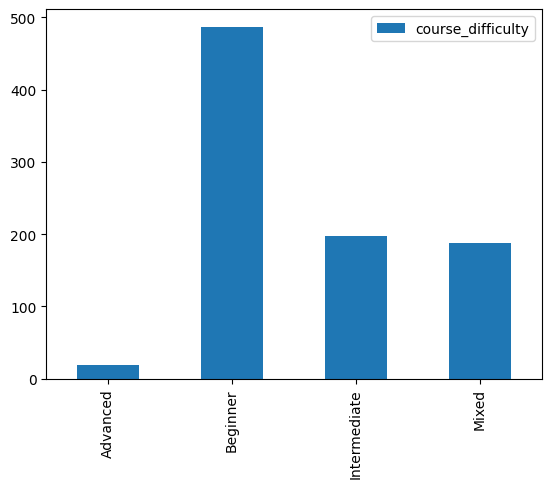

In [ ]:
df['course_difficulty'].value_counts(ascending=True).sort_index(ascending=True).to_frame().plot(kind='bar')

In [ ]:
import numpy as np


arrays = [['학교1', '학교1', '학교1', '학교1', '학교2', '학교2', '학교3', '학교3'], #first
          ['1반', '2반', '1반', '2반', '1반', '2반', '1반', '2반']]             # second

arrays

[['학교1', '학교1', '학교1', '학교1', '학교2', '학교2', '학교3', '학교3'],
 ['1반', '2반', '1반', '2반', '1반', '2반', '1반', '2반']]

In [ ]:
index=pd.MultiIndex.from_arrays(arrays, names=['first','second'])
df=pd.DataFrame({'합격':[1,1,1,1,2,2,3,3],
                 '등수':np.arange(8)},
                index=index)
df

합격  등수
first second        
학교1   1반       1   0
      2반       1   1
      1반       1   2
      2반       1   3
학교2   1반       2   4
      2반       2   5
학교3   1반       3   6
      2반       3   7

In [ ]:
grouped=df.groupby(level=0)
grouped.sum()   # 학교별

,합격,등수
first,,
학교1,4,6
학교2,4,9
학교3,6,13


In [ ]:
df.groupby(level=1).sum()

,합격,등수
second,,
1반,7,12
2반,7,16


In [ ]:
df.groupby(level=[0,1]).sum()   #3가지,2가지 => 총 6가지    , 경우의 수 파악에 용이하다

합격  등수
first second        
학교1   1반       2   2
      2반       2   4
학교2   1반       2   4
      2반       2   5
학교3   1반       3   6
      2반       3   7

In [ ]:
# 약 3년 데이터를 발생(1100일)
index=pd.date_range('10/1/1999',periods=1100)
ts_origin=pd.Series(np.random.normal(0.5,2,1100),index)      #평균0.5, 표준편차 2  # 날짜가 행 이름(index)
print(ts_origin.shape)     #(1100,)
print(ts_origin.head())
# 이동평균법 : 5일평, 20일평 ...    (rolling)   -> 고주파->저주파(주파수를 완만하게 하기 위해)
ts=ts_origin.rolling(window=100,min_periods=100).mean().dropna()
# min_periods 100부터 시작
# 100기간의 평균을 내어 재표현(앞의 99개와 본인 포함의 평균을 내어)
print(ts.shape) #(1001,)
print(ts.head())
ts.tail()                   # ts=time series

(1100,)
1999-10-01    0.083841
1999-10-02   -0.898319
1999-10-03   -0.659932
1999-10-04    0.301584
1999-10-05    6.896910
Freq: D, dtype: float64
(1001,)
2000-01-08    0.431207
2000-01-09    0.436553
2000-01-10    0.490965
2000-01-11    0.511080
2000-01-12    0.532108
Freq: D, dtype: float64


2002-09-30    0.726660
2002-10-01    0.703419
2002-10-02    0.719380
2002-10-03    0.703224
2002-10-04    0.715742
Freq: D, dtype: float64

In [ ]:
# groupby에 적용 가능한 명령들
#   aggreagtion
#   transformation
#   filtering

In [ ]:
# 인덱스 -> 날짜 데이터
# 인덱스를 범주화 : 날짜
transformed=(ts.groupby(lambda x:x.year)        # 연도별로  그룹
    .transform(lambda x: (x-x.mean())/x.std())) # z점수 정규화식,data를 변형
transformed

2000-01-08   -1.071963
2000-01-09   -1.416355
2000-01-10   -1.287922
2000-01-11   -1.203160
2000-01-12   -1.348857
                ...   
2002-09-30   -1.525813
2002-10-01   -1.761236
2002-10-02   -2.020449
2002-10-03   -1.929636
2002-10-04   -1.831372
Freq: D, Length: 1001, dtype: float64

In [ ]:
grouped=ts.groupby(lambda x:x.year)
grouped.mean()      # 연도별 평균

2000    0.668481
2001    0.427717
2002    0.232229
dtype: float64

<Axes: >

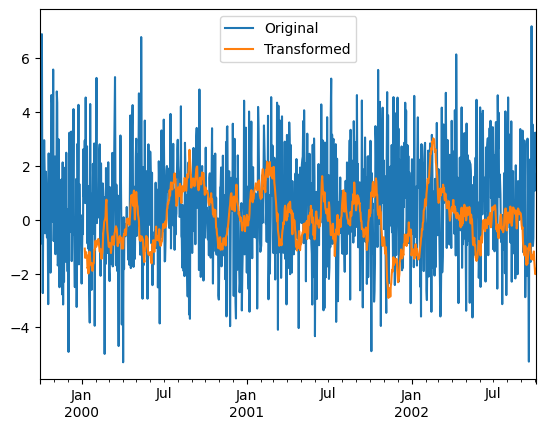

In [ ]:
# 고주파 데이터 : 이동평균법을 적용해서 저주파, z점수 정규화
compare=pd.DataFrame({'Original':ts_origin, 'Transformed':transformed})
compare.plot()

In [ ]:
sf=pd.Series([1,1,2,3,3,3])
sf.groupby(sf).filter(lambda x:x.sum()>2)   #  보다 큰 그룹을 출력

3    3
4    3
5    3
dtype: int64

In [ ]:
import seaborn as sns
planets=sns.load_dataset('planets')
planets.shape

(1035, 6)

In [ ]:
planets.nunique()
# 발견방식, 개수, 궤도 ,   질량, 거리 , 기간

method             10
number              7
orbital_period    988
mass              381
distance          552
year               23
dtype: int64

In [ ]:
planets.apply(pd.unique)

method            [Radial Velocity, Imaging, Eclipse Timing Vari...
number                                        [1, 2, 3, 5, 4, 6, 7]
orbital_period    [269.3, 874.774, 763.0, 326.03, 516.22, 185.84...
mass              [7.1, 2.21, 2.6, 19.4, 10.5, 4.8, 4.64, nan, 1...
distance          [77.4, 56.95, 19.84, 110.62, 119.47, 76.39, 18...
year              [2006, 2008, 2011, 2007, 2009, 2002, 1996, 201...
dtype: object

In [ ]:
planets.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [ ]:
# method 별 orbital_period    의 평균값

planets.groupby('method')['orbital_period'].mean()
# 각 그룹별 개수를 확인해 보시오
planets.groupby('method')['method'].count()

method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           38
Microlensing                      23
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          4
Name: method, dtype: int64

In [ ]:
# 원래의 데이터가 group 에 들어있음
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [ ]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [ ]:
# 문제) 반별 최소값, 중위값 최대값을 구하시오
rng=np.random.RandomState(0)
df=pd.DataFrame({'key':['1반','2반','3반','1반','2반','3반'],
                 '국어':rng.randint(80,100,6),
                 '수학':rng.randint(90,100,6)},
                columns=['key','국어','수학'])
df

,key,국어,수학
0,1반,92,99
1,2반,95,93
2,3반,80,95
3,1반,83,92
4,2반,83,94
5,3반,87,97


In [ ]:
df.groupby('key').min()
df.groupby('key').median()
df.groupby('key').max()

,국어,수학
key,,
1반,92,99
2반,95,94
3반,87,97


In [ ]:
df.groupby('key').agg(['min',np.median,max])

국어             수학           
    min median max min median max
key                              
1반   83   87.5  92  92   95.5  99
2반   83   89.0  95  93   93.5  94
3반   80   83.5  87  95   96.0  97

In [ ]:
df.groupby('key').agg({'국어':'min',
                       '수학':'max'})

,국어,수학
key,,
1반,83,99
2반,83,94
3반,80,97


In [ ]:
# 문제) 수학의 표준편차가 1보다 큰 데이터만 출력하시오
# 필터링의 대상 모든 행에 대해서 판단
def filter_func(x):
    return x['수학'].std()>1

df.groupby('key').filter(filter_func)
df_filtered = df.groupby('key').filter(lambda x: x['수학'].std() > 1)

In [ ]:
flights=sns.load_dataset('flights')
flights.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<ipython-input-102-ea64c3425596>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights.groupby(flights['year']).sum().plot.bar()


<Axes: xlabel='year'>

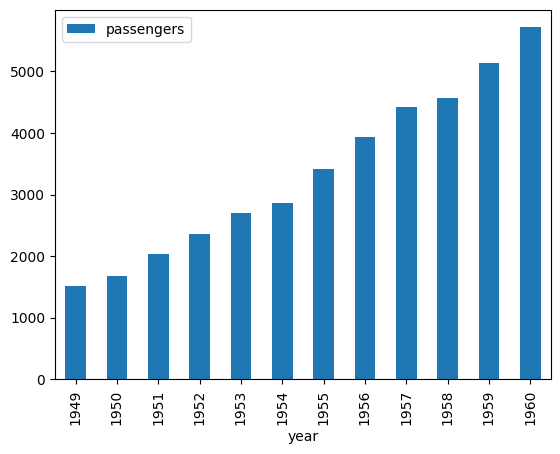

In [ ]:
flights.groupby(flights['year']).sum().plot.bar()

<Axes: xlabel='month'>

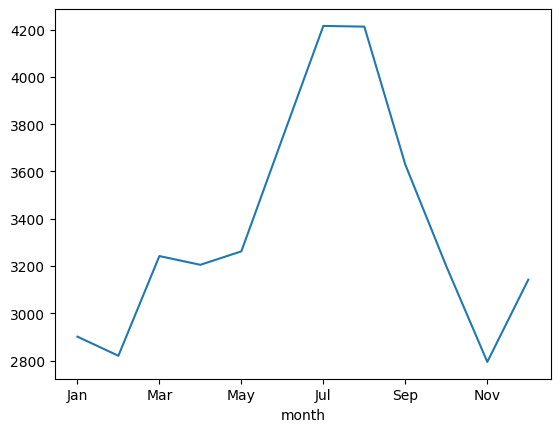

In [ ]:
# 문제) 승객수를 월 별려 합계를 내어 출력해주시오
flights['passengers'].groupby(flights['month']).sum().plot()


In [ ]:
df = pd.DataFrame({'A' : ['일반', '일반', '특수', '예외'] * 6,
                   'B' : ['서울', '대구', '부산'] * 8,
                   'C' : ['건조', '건조', '건조', '우기', '우기', '우기'] * 4,
                   'D' : np.random.randn(24),
                   'E' : np.random.randn(24)})
print(df)

     A   B   C         D         E
0   일반  서울  건조 -0.032843  1.196537
1   일반  대구  건조  1.025239 -0.362606
2   특수  부산  건조  0.581582  0.598772
3   예외  서울  우기 -0.030177  0.735411
4   일반  대구  우기 -0.699742  1.691317
5   일반  부산  우기 -1.108653  1.755665
6   특수  서울  건조  0.068843 -1.517322
7   예외  대구  건조 -0.031664  0.588549
8   일반  부산  건조  0.660819 -1.279283
9   일반  서울  우기 -1.377118 -0.364962
10  특수  대구  우기 -0.430110 -0.610644
11  예외  부산  우기 -1.068271 -0.917008
12  일반  서울  건조  1.261355  1.562100
13  일반  대구  건조  0.394297 -0.512364
14  특수  부산  건조 -0.586007 -2.398806
15  예외  서울  우기 -0.294390  0.674352
16  일반  대구  우기  0.874715  1.044059
17  일반  부산  우기  0.359891 -1.537923
18  특수  서울  건조 -0.432514  0.918933
19  예외  대구  건조 -0.432848 -1.252481
20  일반  부산  건조  1.028847  0.529092
21  일반  서울  우기 -0.904892  0.549485
22  특수  대구  우기 -0.958651  0.247420
23  예외  부산  우기 -0.021023  0.067855


In [ ]:
df.nunique()

A     3
B     3
C     2
D    24
E    24
dtype: int64

In [ ]:
pd.crosstab(df.A,df.C,margins=True) # margins=True 행합 열합계를 내어줌


C,건조,우기,All
A,,,
예외,2,4,6
일반,6,6,12
특수,4,2,6
All,12,12,24


In [ ]:
pd.crosstab(df.A,df.B, normalize=True)  #비율로

B,대구,부산,서울
A,,,
예외,0.083333,0.083333,0.083333
일반,0.166667,0.166667,0.166667
특수,0.083333,0.083333,0.083333


In [ ]:
# 계층적 인덱스 지원    : 기본은 카운
pd.crosstab([df.A,df.B],df.C, margins=True)

C       건조  우기  All
A   B              
예외  대구   2   0    2
    부산   0   2    2
    서울   0   2    2
일반  대구   2   2    4
    부산   2   2    4
    서울   2   2    4
특수  대구   0   2    2
    부산   2   0    2
    서울   2   0    2
All     12  12   24

In [ ]:
# 중복되는 데이터가 있을 수 있음
# 행 열 밸류
pd.crosstab(df.A,df.B,df.D,aggfunc=np.mean) # aggfunc 데이터에 대해서 처리

B,대구,부산,서울
A,,,
예외,-0.232256,-0.544647,-0.162284
일반,0.398627,0.235226,-0.263374
특수,-0.694381,-0.002212,-0.181836


In [ ]:
d = {
    'Name':['영구','일구','이구','삼구','사구','오구', '영구','일구','일구','이구','삼구','사구'],
    'Exam':['중간고사','중간고사','중간고사','중간고사','중간고사','중간고사', '기말고사','기말고사','기말고사','기말고사','기말고사','기말고사'],

    'Subject':['수학','수학','수학','과학','과학','과학',  '수학','수학','수학','과학','과학','과학'],
    'Result':['Pass','Pass','Fail','Pass','Fail','Pass','Pass','Fail','Fail','Pass','Pass','Fail'],
    'Jumsu' : [ 100,80,50,70.,55,80,100,40,50,100,80,30]

}
df = pd.DataFrame(d,columns=['Name','Exam','Subject','Result','Jumsu'])
df
# 데이터를 저장하고 로딩하시오
# df.to_pickle("./data.pkl")
# df=pd.read_pickle("./data.pkl")
df.to_csv('/content/drive/MyDrive/jumsu.csv',index=False, header=False, encoding='UTF-8')

df=pd.read_csv('/content/drive/MyDrive/jumsu.csv',
               names=['Name','Exam','Subject','Result','Jumsu'],
               encoding='UTF-8')



df

,Name,Exam,Subject,Result,Jumsu
0,영구,중간고사,수학,Pass,100.0
1,일구,중간고사,수학,Pass,80.0
2,이구,중간고사,수학,Fail,50.0
3,삼구,중간고사,과학,Pass,70.0
4,사구,중간고사,과학,Fail,55.0
5,오구,중간고사,과학,Pass,80.0
6,영구,기말고사,수학,Pass,100.0
7,일구,기말고사,수학,Fail,40.0
8,일구,기말고사,수학,Fail,50.0
9,이구,기말고사,과학,Pass,100.0


In [ ]:
# 과목별 패스여부를 확인하시오
pd.crosstab(df.Subject, df.Result, margins=True)

Result,Fail,Pass,All
Subject,,,
과학,2,4,6
수학,3,3,6
All,5,7,12


In [ ]:
# 과목별로 대분류 하고 시험별로 소분류된 패스 여부를 카운트하고 합계를 출력
pd.crosstab([df.Subject, df.Exam],df.Result , margins=True)


Result        Fail  Pass  All
Subject Exam                 
과학      기말고사     1     2    3
        중간고사     1     2    3
수학      기말고사     2     1    3
        중간고사     1     2    3
All              5     7   12

In [ ]:

# 시험별로 패스여부를 확인

pd.crosstab(df.Exam, df.Result, margins=True)

Result,Fail,Pass,All
Exam,,,
기말고사,3,3,6
중간고사,2,4,6
All,5,7,12


In [ ]:
# crosstab를 이용한 카이제곱분석
from scipy import stats
# 데이터 프레임 생성
df=pd.DataFrame({
    '성별':['남성','여성','남성','여성','남성'],
    '만족도':['만족','만족','불만족','불만족','만족']
})
crosstab=pd.crosstab(df['성별'],df['만족도'])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print("카이제곱 통계량:",chi2)  # (기대값- 실제값)^2/기대값
print('p-값',p) # 귀무가설을 기각하지 못한다
print("자유도:",dof)       # 자유도에 따라 chi제곱 그래프가 달라짐
print("기대치",expected)

카이제곱 통계량: 0.0
p-값 1.0
자유도: 1
기대치 [[1.8 1.2]
 [1.2 0.8]]


In [ ]:
# pivot
df = pd.DataFrame({"foo": ['one', 'one-1', 'two', 'two'],
                    "bar": ['A', 'A', 'B', 'C'],
                    "baz": [1, 2, 3, 4]})
df

,foo,bar,baz
0,one,A,1
1,one-1,A,2
2,two,B,3
3,two,C,4


In [ ]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1.0,NaN,NaN
one-1,2.0,NaN,NaN
two,NaN,3.0,4.0


In [ ]:
path='/content/drive/MyDrive/daejeon/sales-funnel.xlsx'
df=pd.read_excel(path)
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [ ]:
df.dtypes

Account      int64
Name        object
Rep         object
Manager     object
Product     object
Quantity     int64
Price        int64
Status      object
dtype: object

In [ ]:
df['Status'].unique()

array(['presented', 'pending', 'declined', 'won'], dtype=object)

In [ ]:
df['Status']=df['Status'].astype('category')
df.dtypes

Account        int64
Name          object
Rep           object
Manager       object
Product       object
Quantity       int64
Price          int64
Status      category
dtype: object

In [ ]:
pd.pivot_table(df,index=['Name'])           # 숫자데이터를 이용해서 테이블생성 ( 자동으로)

<ipython-input-160-9740ec8f3b02>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df,index=['Name'])


,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [ ]:
df['Manager'].unique()

array(['Debra Henley', 'Fred Anderson'], dtype=object)

In [ ]:
# 모든 열에 다 적용
# 자유로운 프로그램
# Name =판매원
# Manager 가 관리
pd.pivot_table(df,index=['Name'],columns=['Manager'])

<ipython-input-163-9a2fa10d3c14>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df,index=['Name'],columns=['Manager'])


Account                      Price  \
Manager                      Debra Henley Fred Anderson Debra Henley   
Name                                                                   
Barton LLC                       740150.0           NaN      35000.0   
Fritsch, Russel and Anderson     737550.0           NaN      35000.0   
Herman LLC                            NaN      141962.0          NaN   
Jerde-Hilpert                    412290.0           NaN       5000.0   
Kassulke, Ondricka and Metz           NaN      307599.0          NaN   
Keeling LLC                           NaN      688981.0          NaN   
Kiehn-Spinka                     146832.0           NaN      65000.0   
Koepp Ltd                             NaN      729833.0          NaN   
Kulas Inc                        218895.0           NaN      25000.0   
Purdy-Kunde                           NaN      163416.0          NaN   
Stokes LLC                            NaN      239344.0          NaN   
Trantow-Barrows                  714466.0           NaN      15000.0   

                                               Quantity                
Manager                      Fred Anderson Debra Henley Fred Anderson  
Name                                                                   
Barton LLC                             NaN     1.000000           NaN  
Fritsch, Russel and Anderson           NaN     1.000000           NaN  
Herman LLC                         65000.0          NaN           2.0  
Jerde-Hilpert                          NaN     2.000000           NaN  
Kassulke, Ondricka and Metz         7000.0          NaN           3.0  
Keeling LLC                       100000.0          NaN           5.0  
Kiehn-Spinka                           NaN     2.000000           NaN  
Koepp Ltd                          35000.0          NaN           2.0  
Kulas Inc                              NaN     1.500000           NaN  
Purdy-Kunde                        30000.0          NaN           1.0  
Stokes LLC                          7500.0          NaN           1.0  
Trantow-Barrows                        NaN     1.333333           NaN

In [ ]:
pd.pivot_table(df,index=['Name'],columns=['Manager'],values=['Price'],aggfunc=np.sum)

Price              
Manager                      Debra Henley Fred Anderson
Name                                                   
Barton LLC                        35000.0           NaN
Fritsch, Russel and Anderson      35000.0           NaN
Herman LLC                            NaN       65000.0
Jerde-Hilpert                      5000.0           NaN
Kassulke, Ondricka and Metz           NaN        7000.0
Keeling LLC                           NaN      100000.0
Kiehn-Spinka                      65000.0           NaN
Koepp Ltd                             NaN       70000.0
Kulas Inc                         50000.0           NaN
Purdy-Kunde                           NaN       30000.0
Stokes LLC                            NaN       15000.0
Trantow-Barrows                   45000.0           NaN

In [ ]:
# 계층적 인덱스가 가능하다
pd.pivot_table(df,index=['Manager','Rep'],columns=['Product'],
               values=['Price','Quantity'],aggfunc=[np.mean,len],
               fill_value=0 , margins=True)

mean                               \
                                    Price                                
Product                               CPU Maintenance Monitor Software   
Manager       Rep                                                        
Debra Henley  Craig Booker   32500.000000        5000       0    10000   
              Daniel Hilton  52500.000000           0       0    10000   
              John Smith     35000.000000        5000       0        0   
Fred Anderson Cedric Moss    47500.000000        5000       0    10000   
              Wendy Yule     82500.000000        7000    5000        0   
All                          51666.666667        5500    5000    10000   

                                                                         \
                                           Quantity                       
Product                               All       CPU Maintenance Monitor   
Manager       Rep                                                         
Debra Henley  Craig Booker   20000.000000  1.000000           2       0   
              Daniel Hilton  38333.333333  2.000000           0       0   
              John Smith     20000.000000  1.000000           2       0   
Fred Anderson Cedric Moss    27500.000000  1.500000           1       0   
              Wendy Yule     44250.000000  3.500000           3       2   
All                          30705.882353  1.888889           2       2   

                                                 len                      \
                                               Price                       
Product                     Software       All   CPU Maintenance Monitor   
Manager       Rep                                                          
Debra Henley  Craig Booker         1  1.250000     2           1       0   
              Daniel Hilton        1  1.666667     2           0       0   
              John Smith           0  1.500000     1           1       0   
Fred Anderson Cedric Moss          1  1.250000     2           1       0   
              Wendy Yule           0  3.000000     2           1       1   
All                                1  1.764706     9           4       1   

                                                                       \
                                         Quantity                       
Product                     Software All      CPU Maintenance Monitor   
Manager       Rep                                                       
Debra Henley  Craig Booker         1   4        2           1       0   
              Daniel Hilton        1   3        2           0       0   
              John Smith           0   2        1           1       0   
Fred Anderson Cedric Moss          1   4        2           1       0   
              Wendy Yule           0   4        2           1       1   
All                                3  17        9           4       1   

                                          
                                          
Product                     Software All  
Manager       Rep                         
Debra Henley  Craig Booker         1   4  
              Daniel Hilton        1   3  
              John Smith           0   2  
Fred Anderson Cedric Moss          1   4  
              Wendy Yule           0   4  
All                                3  17

In [ ]:
table=pd.pivot_table(df, index=['Manager','Status'],columns=['Product'],
               values=['Price','Quantity'],
               aggfunc={'Quantity':len,'Price':[np.sum,np.mean]},fill_value=0)
table

Price                                       \
                          mean                                  sum   
Product                    CPU Maintenance Monitor Software     CPU   
Manager       Status                                                  
Debra Henley  declined   35000           0       0        0   70000   
              pending    40000        5000       0        0   40000   
              presented  30000           0       0    10000   30000   
              won        65000           0       0        0   65000   
Fred Anderson declined   65000           0       0        0   65000   
              pending        0        5000       0        0       0   
              presented  30000           0    5000    10000   30000   
              won        82500        7000       0        0  165000   

                                                     Quantity              \
                                                          len               
Product                 Maintenance Monitor Software      CPU Maintenance   
Manager       Status                                                        
Debra Henley  declined            0       0        0        2           0   
              pending         10000       0        0        1           2   
              presented           0       0    20000        1           0   
              won                 0       0        0        1           0   
Fred Anderson declined            0       0        0        1           0   
              pending          5000       0        0        0           1   
              presented           0    5000    10000        1           0   
              won              7000       0        0        2           1   

                                          
                                          
Product                 Monitor Software  
Manager       Status                      
Debra Henley  declined        0        0  
              pending         0        0  
              presented       0        2  
              won             0        0  
Fred Anderson declined        0        0  
              pending         0        0  
              presented       1        1  
              won             0        0

In [ ]:
table.query('Manager==["Debra Henley"]')

Price                                       \
                             mean                                  sum   
Product                       CPU Maintenance Monitor Software     CPU   
Manager      Rep                                                         
Debra Henley Craig Booker   32500        5000       0    10000   65000   
             Daniel Hilton  52500           0       0    10000  105000   
             John Smith     35000        5000       0        0   35000   

                                                        Quantity              \
                                                             len               
Product                    Maintenance Monitor Software      CPU Maintenance   
Manager      Rep                                                               
Debra Henley Craig Booker         5000       0    10000        2           1   
             Daniel Hilton           0       0    10000        2           0   
             John Smith           5000       0        0        1           1   

                                             
                                             
Product                    Monitor Software  
Manager      Rep                             
Debra Henley Craig Booker        0        1  
             Daniel Hilton       0        1  
             John Smith          0        0

In [ ]:
table.query('Status == ["pending","won"]')

Price                                                   \
                        mean                                  sum               
Product                  CPU Maintenance Monitor Software     CPU Maintenance   
Manager       Status                                                            
Debra Henley  pending  40000        5000       0        0   40000       10000   
              won      65000           0       0        0   65000           0   
Fred Anderson pending      0        5000       0        0       0        5000   
              won      82500        7000       0        0  165000        7000   

                                       Quantity                               
                                            len                               
Product               Monitor Software      CPU Maintenance Monitor Software  
Manager       Status                                                          
Debra Henley  pending       0        0        1           2       0        0  
              won           0        0        1           0       0        0  
Fred Anderson pending       0        0        0           1       0        0  
              won           0        0        2           1       0        0

In [ ]:
# 문제) 남녀간에 담배피는 경우가 팁과 관련이 있는지 살펴 보시오

tips=sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
pd.pivot_table(tips,index=['sex'],columns=['smoker'],values=['tip'],aggfunc=np.mean, margins=True, fill_value=0)
# 합계로 하면 경우의 수가 틀려서 안돼요

tip                    
smoker       Yes        No       All
sex                                 
Male    3.051167  3.113402  3.089618
Female  2.931515  2.773519  2.833448
All     3.008710  2.991854  2.998279

In [ ]:
# 팁의 비율이 요일과 점심/저녁 여부와 인원수에 따라 어떤 영향을 받는지에 대해 알아보시오
pd.pivot_table(tips,index=['day','time'],columns=['size'],values=['tip'],aggfunc=np.mean,margins=True, fill_value=0)

tip                                                         
size              1         2         3         4         5      6       All
day  time                                                                   
Thur Lunch   1.8300  2.430638  2.692500  4.218000  5.000000  5.300  2.767705
     Dinner  0.0000  3.000000  0.000000  0.000000  0.000000  0.000  3.000000
Fri  Lunch   1.9200  2.352000  3.000000  0.000000  0.000000  0.000  2.382857
     Dinner  0.0000  2.777273  0.000000  4.730000  0.000000  0.000  2.940000
Sat  Dinner  1.0000  2.517547  3.797778  4.123846  3.000000  0.000  2.993103
Sun  Dinner  0.0000  2.816923  3.120667  4.087778  4.046667  5.000  3.255132
All          1.4375  2.582308  3.393158  4.135405  4.028000  5.225  2.998279

In [ ]:
import pandas as pd
df = pd.DataFrame({
    "성별": ["남성", "여성", "남성", "여성", "남성"],
    "지역": ["수도권", "수도권", "지방", "지방", "수도권"],
    "연령": ["20대", "30대", "40대", "50대", "60대"],
    "만족도": ["만족", "만족", "불만족", "불만족", "만족"]
})
df

,성별,지역,연령,만족도
0,남성,수도권,20대,만족
1,여성,수도권,30대,만족
2,남성,지방,40대,불만족
3,여성,지방,50대,불만족
4,남성,수도권,60대,만족


In [ ]:


df.groupby('연령')['만족도'].describe()

,count,unique,top,freq
연령,,,,
20대,1,1,만족,1
30대,1,1,만족,1
40대,1,1,불만족,1
50대,1,1,불만족,1
60대,1,1,만족,1


In [ ]:

df.groupby('지역')['만족도'].describe()

,count,unique,top,freq
지역,,,,
수도권,3,1,만족,3
지방,2,1,불만족,2


In [ ]:
df.groupby('성별')['만족도'].describe()


,count,unique,top,freq
성별,,,,
남성,3,2,만족,2
여성,2,2,만족,1


In [ ]:
from pandas.core.reshape.pivot import pivot_table
pivot_table= df.pivot_table(index=['성별','지역','연령'],values='만족도',
                            aggfunc=lambda x: x.value_counts(normalize=True).mean())
pivot_table

만족도
성별 지역  연령      
남성 수도권 20대  1.0
       60대  1.0
   지방  40대  1.0
여성 수도권 30대  1.0
   지방  50대  1.0

In [ ]:
pivot_table=df.pivot_table(index=['성별','지역'],
                           columns=['연령'],values='만족도', aggfunc=np.sum)
pivot_table

연령      20대  30대  40대  50대  60대
성별 지역                          
남성 수도권   만족  NaN  NaN  NaN   만족
   지방   NaN  NaN  불만족  NaN  NaN
여성 수도권  NaN   만족  NaN  NaN  NaN
   지방   NaN  NaN  NaN  불만족  NaN

In [ ]:
# 나쁜 데이터
# 부족한 데이터!
# 불균형한 데이터 (imbalance)
# 정규화를 안한 데이터 ( 가중치를 부여한 효과 )
# PCA를 안해서 노이즈를 가지고 있는 것
# 측정에러를 가지고 있는 데이터



In [ ]:
import pandas as pd
data = {'Product': ['Apples', 'Oranges', 'Grapes', 'Bananas', 'Apples', 'Oranges', 'Grapes', 'Bananas'],
        'Region': ['North', 'West', 'South', 'East', 'North', 'West', 'South', 'East'],
        'Sales': [100, 150, 200, 130, 90, 240, 180, 160],
        'Profit': [30, 40, 60, 35, 25, 55, 65, 45]}

df = pd.DataFrame(data)
# 지역별로 제품의 판매량과 이익의 평균을 계산
df

,Product,Region,Sales,Profit
0,Apples,North,100,30
1,Oranges,West,150,40
2,Grapes,South,200,60
3,Bananas,East,130,35
4,Apples,North,90,25
5,Oranges,West,240,55
6,Grapes,South,180,65
7,Bananas,East,160,45


In [ ]:
pivot_table = df.pivot_table(index = ["Product",'Region']  ,values = ["Profit","Sales"], aggfunc =  np.mean)
pivot_table

,,Profit,Sales
Product,Region,,
Apples,North,27.5,95
Bananas,East,40.0,145
Grapes,South,62.5,190
Oranges,West,47.5,195


In [ ]:
#선생님 정답
df["Product"] = df["Product"].astype("category")
df["Region"] = df["Region"].astype("category")
df.head

In [ ]:
import requests # html을 송수신객체
import pandas as pd
from bs4 import BeautifulSoup # 파싱해서 저장하고 있는 객체
import re # regular expression 정규표현식 일일히 뽑기 힘들어서 패턴으로 뽑아냄

In [ ]:
class HTMLParser:
    def parse_url(self, url):
        response= requests.get(url) # HTML로 데이터를 수
        soup=BeautifulSoup(response.text,'html.parser') # BeautifulSoup이 가지고온 HTML은 Text만 자동파싱
        # 웹 브라우저에서 보이기 직전에 메모리에 객체로 파싱해서 보유
        return [(table('id'),self.parse_html_table(table))
             for table in soup.find_all('table')]   # 정규표현식
    def parse_html_table(self,table):
        n_columns=0 #   열
        n_rows=0    #   행
        column_names=[] # 열이름 넣을 준비

        for row in table.find_all('tr'):
            td_tags=row.find_all('td')
            #print(row)
            if len(td_tags) >0: # if td에 데이터가 있으면
                n_rows+=1       # 행 개수 추가
                if n_columns==0:
                    n_columns= len(td_tags) # 열 개수
            th_tags= row.find_all('th')     # 열 이름
            if len(th_tags)>0 and len(column_names)== 0:    # 열 이름이 있고,0 이면 열이름이 없으므로 열이름을 채운다
                for th in th_tags:
                    column_names.append(th.get_text())      # 열 이름을 확정
        # 열이 비어 있으면 빈 개수만큼(열 이름이 없는 만큼) 공백을 앞에 추가
        if len(column_names) > 0 and len(column_names) != n_columns:    # 열이름이 있고, 갯수가 안맞으면
            raise Exception("컬럼 타이틀이 컬럼 숫자와 맞이않는다.")
        columns = column_names if len (column_names)>0 else range (0, n_columns)    # 열 이름이 없을 경우, 번호(행개수)로 넣어주라
        # 데이터 개수와 일치하는 메모리 공간 확보
        df =pd.DataFrame(columns=columns, index=range(0,n_rows))
        row_marker=0    # 행을 카운트 하기 위해서
        for row in table.find_all('tr'):
            column_marker=0
            columns=row.find_all('td')
            for column in columns:
                #          0번째 행에다가 처음 td에서 온 데이터를 넣어줌
                re_text=column.get_text().replace("\n",'')  # new line , 새로운 라인에다 찍어라
                re_text=re_text.replace("\t",'')    # 공백을 입력하라
                re_text=re_text.replace("\r",'')    # carrage return 커서를 선두
                df.iloc[row_marker, column_marker]=column.get_text()
                column_marker+=1
            if len(columns) >0:     # 채워 졌으면
                row_marker +=1      # 다음행으
        for col in df:              # 열 데이터 가져오기: 열내 동질적
            try:            # 숫자 데이터가 아니면 에러, 다른 데이터가 같이 포함되어 있어도
                df[col]=df[col].astype(float)   # 수치변환
            except ValueError:
                pass    # 에러나는 경우는 문자열로 두어라
        return df

In [ ]:
url='https://www.w3schools.com/html/tryit.asp?filename=tryhtml_table_intro'
print(url)
hp=HTMLParser()
table=hp.parse_url(url)[0][1]
table

https://www.w3schools.com/html/tryit.asp?filename=tryhtml_table_intro


,Company,Contact,Country
0,Alfreds Futterkiste,Maria Anders,Germany
1,Centro comercial Moctezuma,Francisco Chang,Mexico
2,Ernst Handel,Roland Mendel,Austria
3,Island Trading,Helen Bennett,UK
4,Laughing Bacchus Winecellars,Yoshi Tannamuri,Canada
5,Magazzini Alimentari Riuniti,Giovanni Rovelli,Italy


In [ ]:
url='https://www.w3schools.com/html/html_tables.asp'
hp=HTMLParser()
table=hp.parse_url(url)[0][1]
table

,Company,Contact,Country
0,Alfreds Futterkiste,Maria Anders,Germany
1,Centro comercial Moctezuma,Francisco Chang,Mexico
2,Ernst Handel,Roland Mendel,Austria
3,Island Trading,Helen Bennett,UK
4,Laughing Bacchus Winecellars,Yoshi Tannamuri,Canada
5,Magazzini Alimentari Riuniti,Giovanni Rovelli,Italy


In [ ]:
url='https://kind.krx.co.kr/common/companysummary.do?method=searchCompanySummary'
hp=HTMLParser()
table=hp.parse_url(url)
table

[]

date = "2021.04.02"
url_part1 = """http://dart.fss.or.kr/dsac001/search.ax?selectDate="""
url_part2 = """&sort=&series=&mdayCnt=0&currentPage="""

url=url_part1+date+url_part2
print(url)
hp=HTMLParser()
table=hp.parse_url(url)[0][1]
table

# 문제 \\\\\\없에re_text=

In [ ]:
# 금일 과제
# table로 된 데이터를 크롤링
# 데이터 요약을 이용해서 insight를 한개이상 얻은 다름
# value_count,groupby, crosstab, pivot, pivot_table
# 파일로 압축 제출

In [ ]:
url='https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J20042&vw_cd=MT_ZTITLE&list_id=P2_6&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do'
hp=HTMLParser()
table=hp.parse_url(url)[]
table

SyntaxError: ignored